<a href="https://colab.research.google.com/github/Prakhar-Mangal/Data-Science-and-Machine-Learning/blob/master/pandas_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDAS

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/codebasics/py/master/pandas/4_read_write_to_excel/stock_data.csv'
pd.read_csv(url, na_values={
    "eps": ["not available","n.a."],
    "revenue" : -1,
    "people": ["not available","n.a."],
    "price": ["not available","n.a."]
})


,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


In [0]:
def convert_people_cell(cell):
  if cell == 'n.a.':
    return 'prakhar mangal'
  return cell
pd.read_csv(url, converters={
    "people" : convert_people_cell
})

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,prakhar mangal
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


# Replacing Missing Values Pandas

In [0]:
import pandas as pd
url1="https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
ndf=pd.read_csv(url1,parse_dates=["day"])
ndf.set_index('day', inplace=True)
ndf

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [0]:
ndf.fillna({
    "temperature" : 0,
    "windspeed" : 0,
    "event" : 'not available'
})

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,not available
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,not available
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [0]:
# forward fill ffill
# backward fill bfill
ndf.fillna(method='bfill') 

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [0]:
ndf.interpolate(method="time") # near time more accurate guess in this scenario

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [0]:
# dropna #thresh = 1 (1 valid vaue should be there) ,2,3 etc..
ndf.dropna(how="all")

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [0]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
tdf = ndf.reindex(idx)
tdf

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


# Handle Missing data

In [0]:
url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/6_handling_missing_data_replace/weather_data.csv"

df2 = pd.read_csv(url)
df2

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [0]:
import numpy as np
df2.replace({
    "temperature" : -99999,
    "windspeed" : -99999,
    "event" : '0'
},np.NaN)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [0]:
df2 = df2.replace({
    -99999:np.NaN, 
    "0" : "Sunny"
})
df2

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,Sunny
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,Sunny


# Treating unwanted parameters (units) --> Regex

In [0]:
df2.iloc[0,1] = "32 F"
df2.iloc[4,1] = "32 C"
df2.iloc[0,2] = "6 mph"
df2.iloc[1,2] = "7 mph"
df2

,day,temperature,windspeed,event
0,1/1/2017,32 F,6 mph,Rain
1,1/2/2017,NaN,7 mph,Sunny
2,1/3/2017,28,NaN,Snow
3,1/4/2017,NaN,7,Sunny
4,1/5/2017,32 C,NaN,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,Sunny


In [0]:
df2.replace({
    "temperature" : '[A-Za-z]',
    "windspeed" : '[A-Za-z]'
},'',regex=True)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,NaN,7,Sunny
2,1/3/2017,28,NaN,Snow
3,1/4/2017,NaN,7,Sunny
4,1/5/2017,32,NaN,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,Sunny


In [0]:
df3 = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df3

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [0]:
df3 = df3.replace(['poor','average','good','exceptional'],[1,2,3,4])
df3

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


# GroupBy in Pandas

In [0]:
url4 = 'https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv'
df4 = pd.read_csv(url4)
df4

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [0]:
g = df4.groupby('city')

In [0]:
for city, city_df in g:
  print(city)
  print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [0]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [0]:
g.max() # SPLIT APPLY COMBINE

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [0]:
g.describe() 

temperature                         ... windspeed                   
               count   mean       std   min  ...       25%   50%    75%   max
city                                         ...                             
mumbai           4.0  88.50  3.109126  85.0  ...      5.00   8.5  12.75  15.0
new york         4.0  32.25  3.304038  28.0  ...      6.75   7.0   8.25  12.0
paris            4.0  47.75  5.315073  42.0  ...      9.50  11.5  14.75  20.0

[3 rows x 16 columns]

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

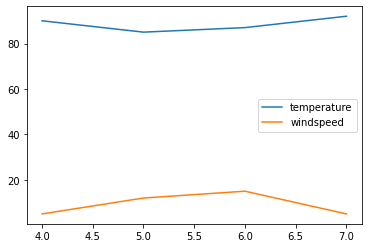

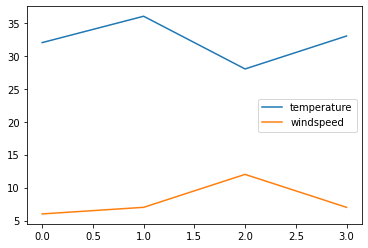

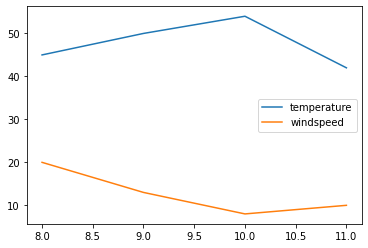

In [0]:
g.plot()

# Conacatination Pandas

In [0]:
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [0]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [0]:
df4 = pd.concat([india_weather, us_weather], ignore_index=True,)
df4

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [0]:
df4 = pd.concat([india_weather, us_weather], keys=['india', 'us'])
df4

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [0]:
df4.loc['india']

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [0]:
df4.loc['us']

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [0]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [0]:

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


In [0]:
df5 = pd.concat([temperature_df, windspeed_df], axis=1)
df5

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


In [0]:

s = pd.Series(["Humid","Dry","Rain"], name="event")
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

# Matplotlib Basics

In [0]:
import matplotlib.pyplot as plt

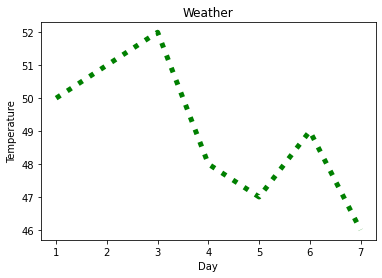

In [0]:
x=[1,2,3,4,5,6,7]
y=[50,51,52,48,47,49,46]
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Weather')
plt.plot(x, y, color = 'green', linewidth = 5, linestyle = 'dotted')

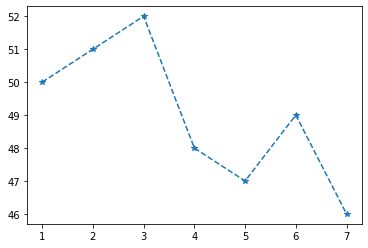

In [0]:
plt.plot(x, y, '*--') #format string in single line

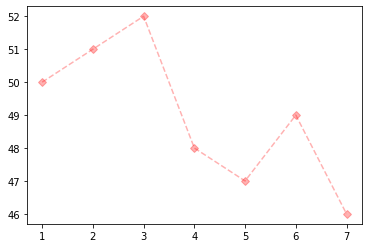

In [0]:


plt.plot(x, y, 'rD--', alpha=0.3)

# Axes Labels, Legend, Grid

In [0]:
days=[1,2,3,4,5,6,7]
max_t=[50,51,52,48,47,49,46]
min_t=[43,42,40,44,33,35,37]
avg_t=[45,48,48,46,40,42,41]

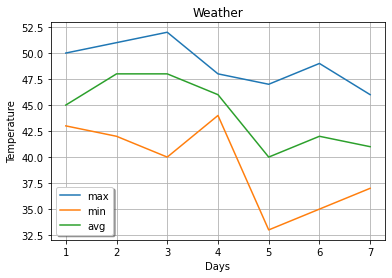

In [0]:
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Weather')
plt.plot(days,max_t, label='max')
plt.plot(days,min_t, label='min')
plt.plot(days,avg_t, label='avg')
plt.legend(loc='best', shadow='true')

plt.grid()

# Bar Graph

In [0]:
import matplotlib.pyplot as plt
import numpy as np

company=['GOOGL','AMZN','MSFT','FB']
revenue=[90,136,89,27]

In [0]:
xpos = np.arange(len(company))
xpos

array([0, 1, 2, 3])

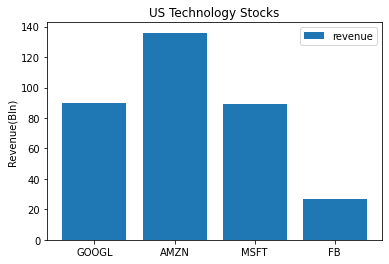

In [0]:
plt.xticks(x1pos,company)
plt.ylabel("Revenue(Bln)")
plt.title('US Technology Stocks')
plt.bar(x1pos, revenue, label="revenue")
plt.legend()

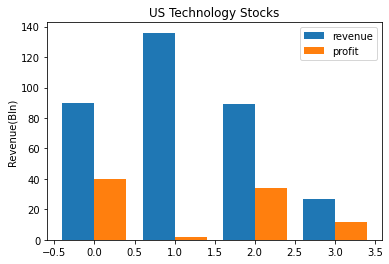

In [0]:
profit=[40,2,34,12]
plt.ylabel('Revenue(Bln)')
plt.title('US Technology Stocks')
plt.bar(xpos-0.2, revenue, width=0.4, label='revenue')
plt.bar(xpos+0.2, profit, width=0.4, label='profit')
plt.legend()

# Histogram

(array([3., 3., 1., 0., 1., 1., 0., 2., 0., 2.]),
 array([ 77. ,  84.3,  91.6,  98.9, 106.2, 113.5, 120.8, 128.1, 135.4,
        142.7, 150. ]),
 <a list of 10 Patch objects>)

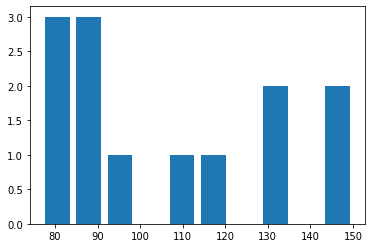

In [0]:
blood_sugar = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
plt.hist(blood_sugar, rwidth=0.8) # by default number of bins is set to 10


# Histogram showing normal, pre-diabetic and diabetic patients distribution


*   80-100: Normal
*   100-125: Pre-diabetic
*   80-100: Diabetic





(array([6., 2., 4.]), array([ 80, 100, 125, 150]), <a list of 3 Patch objects>)

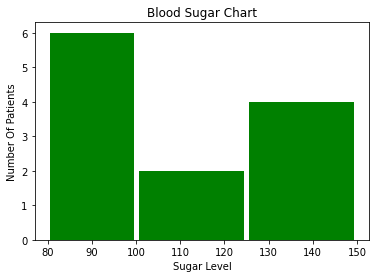

In [0]:

plt.xlabel("Sugar Level")
plt.ylabel("Number Of Patients")
plt.title("Blood Sugar Chart")

plt.hist(blood_sugar, bins=[80,100,125,150], rwidth=0.95, color='g')

# Mutiple data samples in a histogram

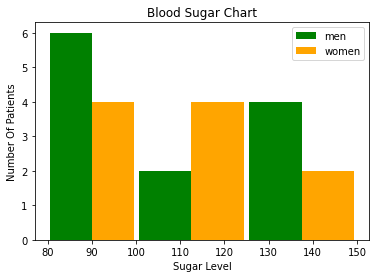

In [0]:
plt.xlabel("Sugar Level")
plt.ylabel("Number Of Patients")
plt.title("Blood Sugar Chart")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([blood_sugar_men,blood_sugar_women], bins=[80,100,125,150], rwidth=0.95, color=['green','orange'],label=['men','women'])
plt.legend()

#histtype=step

(array([6., 2., 4.]), array([ 80, 100, 125, 150]), <a list of 1 Patch objects>)

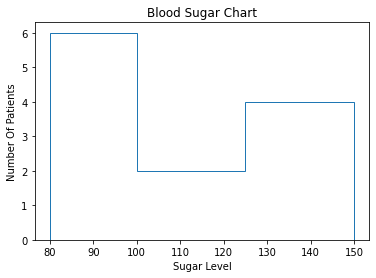

In [0]:
plt.xlabel("Sugar Level")
plt.ylabel("Number Of Patients")
plt.title("Blood Sugar Chart")

plt.hist(blood_sugar,bins=[80,100,125,150],rwidth=0.95,histtype='step')

(array([6., 2., 4.]), array([ 80, 100, 125, 150]), <a list of 3 Patch objects>)

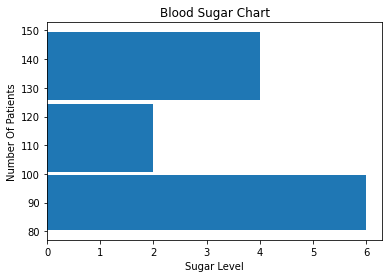

In [0]:
plt.xlabel("Sugar Level")
plt.ylabel("Number Of Patients")
plt.title("Blood Sugar Chart")

plt.hist(blood_sugar,bins=[80,100,125,150],rwidth=0.95, orientation='horizontal')

# Draw pie chart to track down home expenses

([<matplotlib.patches.Wedge at 0x7fda442c0828>,
 [Text(0.09328656407206024, 1.0960372333838069, 'Home Rent'),
  Text(-0.9822184890776084, -0.4952240298229684, 'Food'),
  Text(-0.16284704617934698, -1.0878790555712807, 'Phone/Internet Bill'),
  Text(0.6256100334857941, -0.9047718419590123, 'Car '),
  Text(1.0615045230766318, -0.28845822485734873, 'Other Utilities')])

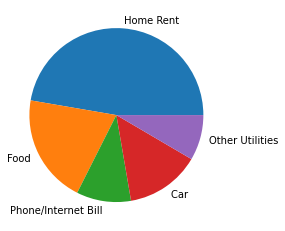

In [0]:
exp_vals = [1400,600,300,410,250]
exp_labels = ["Home Rent","Food","Phone/Internet Bill","Car ","Other Utilities"]
plt.pie(exp_vals,labels=exp_labels)

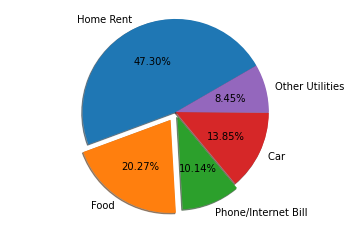

In [0]:
plt.pie(exp_vals,labels=exp_labels, radius = 2, autopct='%0.2f%%' ,shadow=True, explode=[0,0.2,0.1,0,0], startangle=30)
plt.axis("equal")
plt.show()